## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [27]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Sat Jul 11 23:35:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106... WDDM  | 00000000:01:00.0  On |                  N/A |
| 12%   53C    P2    30W / 156W |   5886MiB /  6144MiB |     10%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [18]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [19]:
train, test = keras.datasets.cifar10.load_data()

In [20]:
## 資料前處理
"""
Your code here
"""


def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [21]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+2))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model



In [23]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.9306 - accuracy: 0.3032 - val_loss: 1.7613 - val_accuracy: 0.3764
Epoch 2/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.7016 - accuracy: 0.3916 - val_loss: 1.6510 - val_accuracy: 0.4159
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.6076 - accuracy: 0.4291 - val_loss: 1.6010 - val_accuracy: 0.4232
Epoch 4/100
50000/50000 [==============================] - 2s 49us/step - loss: 1.5389 - accuracy: 0.4509 - val_loss: 1.5973 - val_accuracy: 0.4244
Epoch 5/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.4983 - accuracy: 0.4662 - val_loss: 1.5058 - val_accuracy: 0.4587
Epoch 6/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.4626 - accuracy: 0.4796 - val_loss: 1.5021 - val_accuracy: 0.4680
Epoch 7/100
50000/50000 [==============================] - 2s 

Epoch 56/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.5713 - accuracy: 0.7932 - val_loss: 1.9635 - val_accuracy: 0.5158
Epoch 57/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.5783 - accuracy: 0.7919 - val_loss: 1.8850 - val_accuracy: 0.5140
Epoch 58/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.5593 - accuracy: 0.7982 - val_loss: 2.0110 - val_accuracy: 0.5151
Epoch 59/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.5580 - accuracy: 0.8008 - val_loss: 1.9831 - val_accuracy: 0.5105
Epoch 60/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.5399 - accuracy: 0.8049 - val_loss: 2.0093 - val_accuracy: 0.5103
Epoch 61/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.5164 - accuracy: 0.8158 - val_loss: 2.1382 - val_accuracy: 0.5044
Epoch 62/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.5242 - accuracy: 0.8104

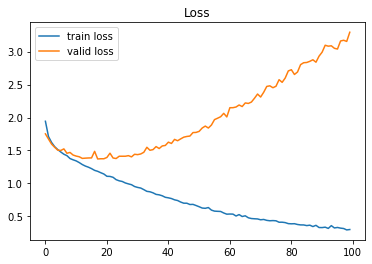

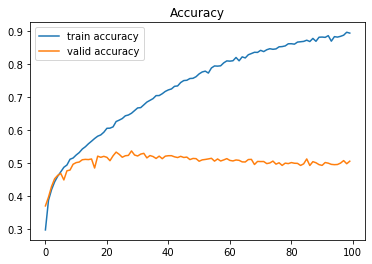

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()